<a href="https://colab.research.google.com/github/Mariana-zy/SyS-2025-2S/blob/main/EjercicioSerieFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

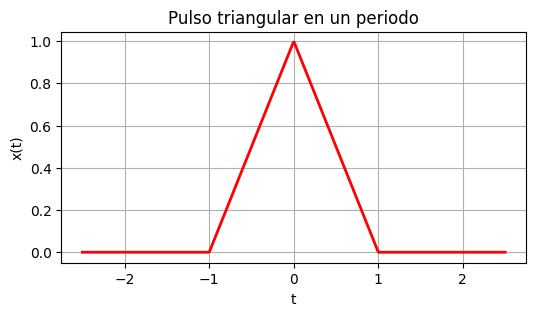

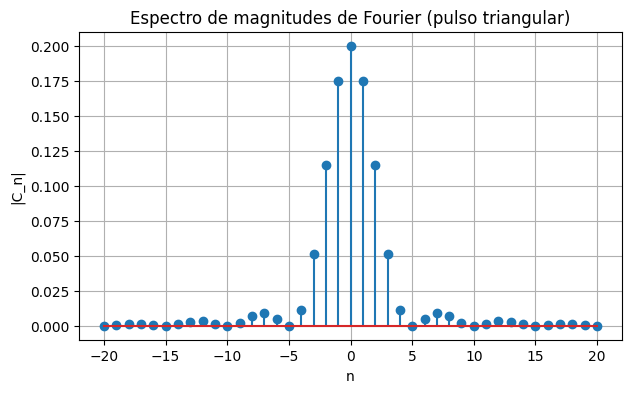

interactive(children=(IntSlider(value=5, description='Nh', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.reconstruccion(Nh=5)>

In [6]:
 # Serie de Fourier para un pulso triangular

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Parámetros de la señal
B = 1      # amplitud
d1 = 1     # semibase del pulso triangular
T = 5      # periodo
Fs = 500   # frecuencia de muestreo
w0 = 2*np.pi/T

# Vector de tiempo en un periodo
t = np.linspace(-T/2, T/2, Fs)

# Definición de la señal triangular x(t)
x = np.zeros_like(t)
for i,ti in enumerate(t):
    if -d1 <= ti <= 0:
        x[i] = (B/d1)*(ti + d1)   # subida
    elif 0 <= ti <= d1:
        x[i] = (-B/d1)*ti + B     # bajada
    else:
        x[i] = 0

plt.figure(figsize=(6,3))
plt.plot(t, x, 'r', linewidth=2)
plt.grid(); plt.xlabel("t"); plt.ylabel("x(t)")
plt.title("Pulso triangular en un periodo")
plt.show()

# ----------------------------
# Cálculo de coeficientes Fourier
# ----------------------------
def Cn(n):
    if n == 0:
        return (B*d1)/T
    else:
        return (B*T/(np.pi**2 * d1 * n**2)) * (np.sin(n*np.pi*d1/T))**2

# Vector de armónicos
N = 20
n_vals = np.arange(-N, N+1)
C_vals = np.array([Cn(n) for n in n_vals])

# Graficar espectro
plt.figure(figsize=(7,4))
plt.stem(n_vals, np.abs(C_vals))
plt.xlabel("n"); plt.ylabel("|C_n|")
plt.title("Espectro de magnitudes de Fourier (pulso triangular)")
plt.grid()
plt.show()

# ----------------------------
# Reconstrucción de la señal
# ----------------------------
def reconstruccion(Nh=5):
    x_rec = np.zeros_like(t, dtype=complex)
    for n in range(-Nh, Nh+1):
        x_rec += Cn(n)*np.exp(1j*n*w0*t)
    plt.figure(figsize=(6,3))
    plt.plot(t, x, 'r', label="x(t)", linewidth=2)
    plt.plot(t, np.real(x_rec), 'b', label=f"x_rec(t), N={Nh}")
    plt.grid(); plt.xlabel("t"); plt.ylabel("x(t)")
    plt.legend()
    plt.show()

interact(reconstruccion, Nh=(1,N,1))
